<a href="https://colab.research.google.com/github/Arckitecht/Data-Clustering/blob/main/Clustering%20Exercise%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from matplotlib.pyplot import figure

In [ ]:
from google.colab import files
upload = files.upload()

Saving data_centroid_batavia.csv to data_centroid_batavia (1).csv


In [ ]:
cd 'drive/MyDrive/Colab Notebooks'

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks'
/content


In [ ]:
df = pd.read_csv('data_centroid_batavia.csv')

In [ ]:
data = df[["center_latitude","center_longitude"]]
data.head()

,center_latitude,center_longitude
0,-6.210001,106.874027
1,-6.271032,106.872621
2,-6.292765,106.872117
3,-6.153151,106.719031
4,-6.212191,106.946598


In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

cols = data.columns
X = ms.fit_transform(data)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

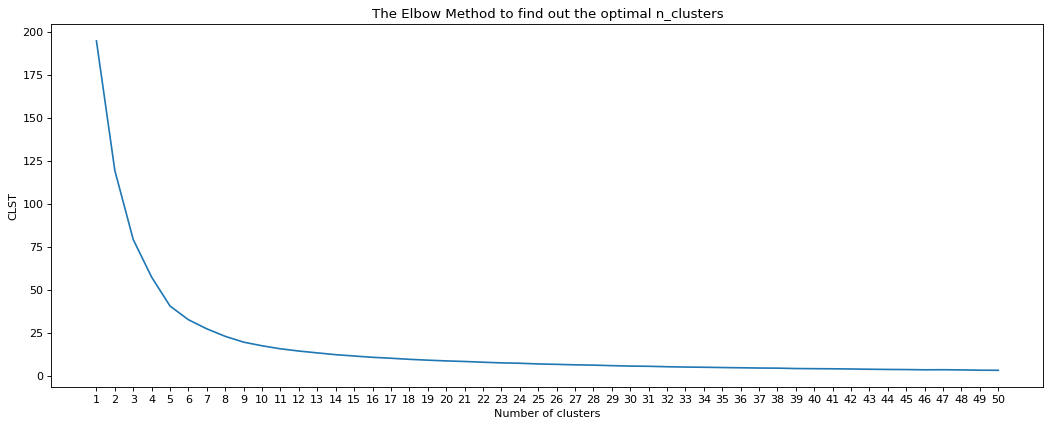

In [ ]:
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure

clst = []
for i in range(1, 51):
    kmean = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmean.fit(X)
    clst.append(kmean.inertia_)

figure(figsize=(16, 6), dpi=80)
plt.plot(range(1, 51), clst)
plt.title('The Elbow Method to find out the optimal n_clusters')
plt.xlabel('Number of clusters')
plt.ylabel('CLST')
plt.xticks(range(1,51))
plt.show()

# Ignore the "/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are 
# all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2. FutureWarning", it's just like some kind of loading or
# booting (you can see that there's a line which says "an error will be raised in 1.2", an error means SSE (Sum of Squared Errors which means
# for each of the clusters, you try to compute the distance of individual data points from the centroid, you squared it and then you sum it up)

In [ ]:
X.head()

,center_latitude,center_longitude
0,0.796248,0.485427
1,0.687061,0.483387
2,0.648180,0.482655
3,0.897957,0.260592
4,0.792330,0.590697


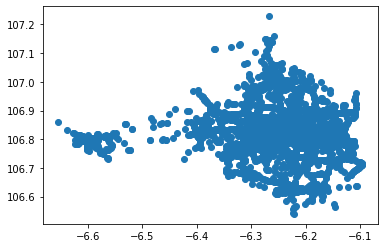

In [ ]:
plt.scatter(data['center_latitude'],data['center_longitude'])

In [ ]:
kmean = KMeans(n_clusters=6, random_state=0)
kmean.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KMeans(n_clusters=6, random_state=0)

In [ ]:
label = kmean.fit_predict(X)
label

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([5, 5, 0, ..., 0, 3, 1], dtype=int32)

In [ ]:
centroids = kmean.cluster_centers_

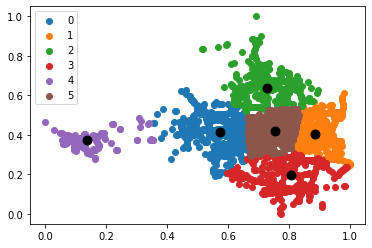

In [ ]:
#Unique Labels
uni_labels = np.unique(label)

for i in uni_labels:
    plt.scatter(X.values[label == i , 0] , X.values[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()